In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
from google.colab import files

In [ ]:
uploaded = files.upload()

TypeError: ignored

In [ ]:
data = pd.read_csv('diabetes.csv')
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [ ]:
imc = np.array(data["BMI"])
imc =np.sort(imc)
gender = np.array(list(data["Gender"]))
ii_m = gender=="M"
ii_f = gender=="F"
n_m = np.count_nonzero(ii_m)
n_f = np.count_nonzero(ii_f)
n_minm = np.min(imc[ii_m])
n_minf = np.min(imc[ii_f])
n_maxm = np.max(imc[ii_m])
n_maxf = np.max(imc[ii_f])
print(n_minm,n_minf)
print(n_maxm,n_maxf)
rd=np.absolute(np.mean(imc[ii_m])-np.mean(imc[ii_f]))
print(rd)
#np.median(imc[ii_m]),np.median(imc[ii_f])

19.0 19.0
47.75 39.18
0.5663879531829821


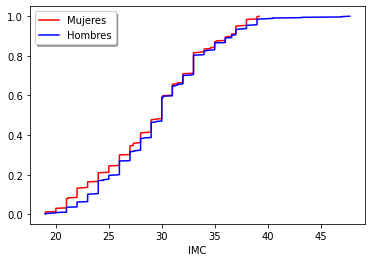

In [ ]:
plt.plot(np.sort(imc[ii_f]), np.linspace(1/n_f,1,n_f),color="red")
plt.plot(np.sort(imc[ii_m]), np.linspace(1/n_m,1,n_m),color="blue")
plt.xlabel("IMC")
plt.legend(('Mujeres', 'Hombres'),loc='upper left', shadow=True)
plt.savefig('im1.pdf')  
plt.show()


Hombres tienen un rango más alto del IMC, el IMC por debajo es similar en hombres y mujeres. Sin embargo, para el límite superior existe una diferencia superior
a 8 unidades. Dispersión más alta para los hombres que para las mujeres. 

In [ ]:
hbc = np.array(data["HbA1c"])
#hbc =np.sort(hbc)
gender = np.array(list(data["Gender"]))
ii_m = gender=="M"
ii_f = gender=="F"
ng_m = np.count_nonzero(ii_m)
ng_f = np.count_nonzero(ii_f)
ng_minm = np.min(hbc[ii_m])
ng_minf = np.min(hbc[ii_f])
ng_maxm = np.max(hbc[ii_m])
ng_maxf = np.max(hbc[ii_f])
print(ng_minm,ng_minf)
print(ng_maxm,ng_maxf)
rdg=np.absolute(np.mean(hbc[ii_m])-np.mean(hbc[ii_f]))
print(rdg)
#np.median(hbc[ii_m]),np.median(hbc[ii_f])

0.9 0.9
15.9 16.0
0.034945556869621086


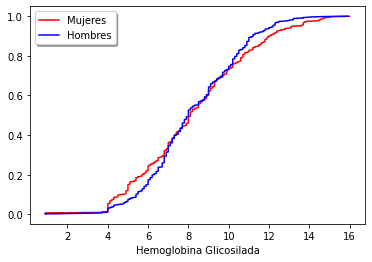

In [ ]:
# Frecuencias acumulativas
plt.plot(np.sort(hbc[ii_f]), np.linspace(1/ng_f,1,ng_f),color="red")
plt.plot(np.sort(hbc[ii_m]), np.linspace(1/ng_m,1,ng_m),color="blue")
plt.xlabel("Hemoglobina Glicosilada")
plt.legend(('Mujeres', 'Hombres'),loc='upper left', shadow=True)
plt.show()


Similitud entre los rangos de máximos y mínimos para muestras de hemoglobinas glicosiladas, por otro lado, la mediana de estas dos poblaciones son similares.

**¿Es significativa la diferencia de las medias obtenidas para los parámetros IMC y HMG?**


H_o= Las distribuciones para los datos de los parámetros de IMC y HMG de hombres y mujeres son iguales.

In [22]:
#Método de Remuestreo
n_intentos = 100000
dif = np.zeros(n_intentos)
for i in range(n_intentos):
  np.random.shuffle(imc)
  valor_fake_m = imc[n_m:]
  valor_fake_f = imc[:n_f]
  #print(np.mean(imc), np.mean(valor_fake_m))
  #print(np.mean(imc), np.mean(valor_fake_f))
  dif[i] = np.mean(valor_fake_f)-np.mean(valor_fake_m)
#print(difm)
#print(diff)

No handles with labels found to put in legend.


0.0459


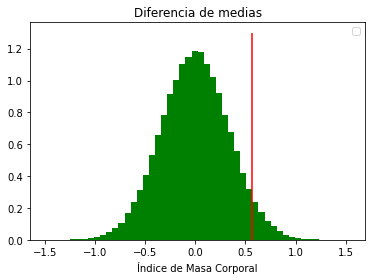

In [26]:
_=plt.hist(dif,bins=50,color="green", density=True)
plt.vlines(rd,0,1.3,color="red", label = "0.14507")
plt.xlabel("Índice de Masa Corporal")
plt.legend()
plt.title('Diferencia de medias')
frac_a = np.count_nonzero(dif>rd)/len(dif)
print(frac_a)

In [ ]:
#Método de Remuestreo
n_intentos = 100000
difg = np.zeros(n_intentos)
for i in range(n_intentos):
  np.random.shuffle(hbc)
  valorg_fake_m = hbc[ng_m:]
  valorg_fake_f = hbc[:ng_f]
  #print(np.mean(hbc), np.mean(valorg_fake_m))
  #print(np.mean(hbc), np.mean(valorg_fake_f))
  difg[i] = np.mean(valorg_fake_f)-np.mean(valorg_fake_m)
#print(difm)
#print(diff)

0.45782


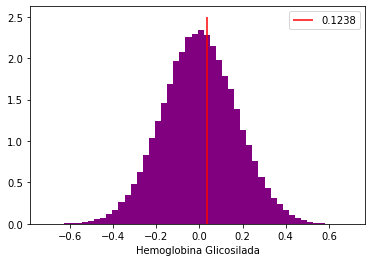

In [ ]:
_=plt.hist(difg,bins=50, color="purple", density=True)
plt.vlines(rdg,0,2.5,color="red", label = "0.1238")
plt.xlabel("Hemoglobina Glicosilada")
plt.legend()
fracg_a = np.count_nonzero(dif>rdg)/len(difg)
print(fracg_a)